In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Load .env environment variables
load_dotenv()

True

In [3]:
# Set alpaca api key and secret 
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)


In [4]:
# Set the tickers
microsoft = ["MSFT"]

In [5]:
# Set timeframe to one day ('1D') for the Alpaca API
timeframe = "1D"

In [6]:
# Format current date as ISO format
today = pd.Timestamp("2022-06-01", tz="America/New_York").isoformat()

In [7]:
# Get current closing prices for MSFT
df_microsoft = alpaca.get_bars(
    microsoft,
    timeframe,
    start = today,
    end = today
).df

# Display sample data
df_microsoft

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2022-06-01 04:00:00+00:00,275,277.69,270.04,272.42,25108530,318649,273.328471,MSFT


In [8]:
# Format start and end dates as ISO format for five year period
start = pd.Timestamp("2017-06-01", tz="America/New_York").isoformat()
end = pd.Timestamp("2022-06-01", tz="America/New_York").isoformat()

In [9]:
# Get closing prices for MSFT from the five years
df_microsoft_daily = alpaca.get_bars(
    microsoft,
    timeframe,
    start = start,
    end = end,
    limit = 10000
).df

# Drop unneccesary columns
df_microsoft_daily = df_microsoft_daily.drop(["trade_count", "vwap"], axis=1)
# Display sample data
df_microsoft_daily

,open,high,low,close,volume,symbol
timestamp,,,,,,
2017-06-01 04:00:00+00:00,70.24,70.61,69.4510,70.10,21922908,MSFT
2017-06-02 04:00:00+00:00,70.44,71.86,70.2400,71.76,35470261,MSFT
2017-06-05 04:00:00+00:00,71.97,72.89,71.8100,72.28,33317996,MSFT
2017-06-06 04:00:00+00:00,72.30,72.62,72.2700,72.52,31511065,MSFT
2017-06-07 04:00:00+00:00,72.67,72.77,71.9500,72.39,22302769,MSFT
...,...,...,...,...,...,...
2022-05-25 04:00:00+00:00,258.36,264.58,257.1250,262.52,28402776,MSFT
2022-05-26 04:00:00+00:00,262.29,267.11,261.4294,265.90,24933202,MSFT
2022-05-27 04:00:00+00:00,268.51,273.34,267.5600,273.24,26809462,MSFT


In [10]:
# Reorganize the DataFrame
# Separate ticker data
#MSFT = df_portfolio_years[df_portfolio_years['symbol']=='MSFT'].drop('symbol', axis=1)
#TSLA = df_portfolio_years[df_portfolio_years['symbol']=='TSLA'].drop('symbol', axis=1)
# Concatenate the ticker DataFrames
#df_portfolio_years = pd.concat([MSFT, TSLA],axis=1, keys=['MSFT','TSLA'])
#df_portfolio_years

In [11]:
# For loop to input any stock to get alpaca stock data

def get_company(ticker, start, end, tradeapi):
    return alpaca.get_bars(
        ticker,
        TimeFrame.Day,
        start,
        end
    ).df


In [12]:
# Create a new df filtering the index and close columns
microsoft_signals_df = df_microsoft_daily.loc[:, ["close"]]

# Create a column for the daily returns
microsoft_signals_df["Actual Returns"] = df_microsoft_daily["close"].pct_change()

# Drop all NaN values from the DataFrame
microsoft_signals_df = microsoft_signals_df.dropna()

# Show signals df
display(microsoft_signals_df.head())
display(microsoft_signals_df.tail())

,close,Actual Returns
timestamp,,
2017-06-02 04:00:00+00:00,71.76,0.023680
2017-06-05 04:00:00+00:00,72.28,0.007246
2017-06-06 04:00:00+00:00,72.52,0.003320
2017-06-07 04:00:00+00:00,72.39,-0.001793
2017-06-08 04:00:00+00:00,71.95,-0.006078


,close,Actual Returns
timestamp,,
2022-05-25 04:00:00+00:00,262.52,0.011170
2022-05-26 04:00:00+00:00,265.90,0.012875
2022-05-27 04:00:00+00:00,273.24,0.027604
2022-05-31 04:00:00+00:00,271.87,-0.005014
2022-06-01 04:00:00+00:00,272.42,0.002023


In [13]:
# EWMA indicators
short_span = 8
long_span = 20
smooth_span = 4
df_microsoft_ewma = microsoft_signals_df.loc[:, ["close"]]
df_microsoft_ewma['8EWMA'] = df_microsoft_ewma['close'].ewm(span= short_span).mean()
df_microsoft_ewma['20EWMA'] = df_microsoft_ewma['close'].ewm(span= long_span).mean()
df_microsoft_ewma

,close,8EWMA,20EWMA
timestamp,,,
2017-06-02 04:00:00+00:00,71.76,71.760000,71.760000
2017-06-05 04:00:00+00:00,72.28,72.052500,72.033000
2017-06-06 04:00:00+00:00,72.52,72.248705,72.211823
2017-06-07 04:00:00+00:00,72.39,72.298226,72.263260
2017-06-08 04:00:00+00:00,71.95,72.190054,72.187485
...,...,...,...
2022-05-25 04:00:00+00:00,262.52,260.173906,266.336119
2022-05-26 04:00:00+00:00,265.90,261.446371,266.294584
2022-05-27 04:00:00+00:00,273.24,264.067178,266.956052


In [14]:
# Create column "Signal" such that if 8EWMA is gerater than 20EWMA then set sugnal to 1, else 
df_microsoft_ewma['Signal'] = 0.0
df_microsoft_ewma['Signal'] = np.where(df_microsoft_ewma['8EWMA'] > df_microsoft_ewma['20EWMA'], 1.0, 0.0
)

df_microsoft_ewma

,close,8EWMA,20EWMA,Signal
timestamp,,,,
2017-06-02 04:00:00+00:00,71.76,71.760000,71.760000,0.0
2017-06-05 04:00:00+00:00,72.28,72.052500,72.033000,1.0
2017-06-06 04:00:00+00:00,72.52,72.248705,72.211823,1.0
2017-06-07 04:00:00+00:00,72.39,72.298226,72.263260,1.0
2017-06-08 04:00:00+00:00,71.95,72.190054,72.187485,1.0
...,...,...,...,...
2022-05-25 04:00:00+00:00,262.52,260.173906,266.336119,0.0
2022-05-26 04:00:00+00:00,265.90,261.446371,266.294584,0.0
2022-05-27 04:00:00+00:00,273.24,264.067178,266.956052,0.0


In [15]:
# create a new column 'Position' which is a day-to-day difference of the 'Signal' column
df_microsoft_ewma['Position'] = df_microsoft_ewma['Signal'].diff()
df_microsoft_ewma.head(30)

,close,8EWMA,20EWMA,Signal,Position
timestamp,,,,,
2017-06-02 04:00:00+00:00,71.76,71.760000,71.760000,0.0,NaN
2017-06-05 04:00:00+00:00,72.28,72.052500,72.033000,1.0,1.0
2017-06-06 04:00:00+00:00,72.52,72.248705,72.211823,1.0,0.0
2017-06-07 04:00:00+00:00,72.39,72.298226,72.263260,1.0,0.0
2017-06-08 04:00:00+00:00,71.95,72.190054,72.187485,1.0,0.0
2017-06-09 04:00:00+00:00,70.32,71.656332,71.793531,0.0,-1.0
2017-06-12 04:00:00+00:00,69.78,71.152643,71.412822,0.0,0.0
2017-06-13 04:00:00+00:00,70.65,71.023673,71.280965,0.0,0.0
2017-06-14 04:00:00+00:00,70.27,70.836717,71.118801,0.0,0.0


<AxesSubplot:xlabel='timestamp'>

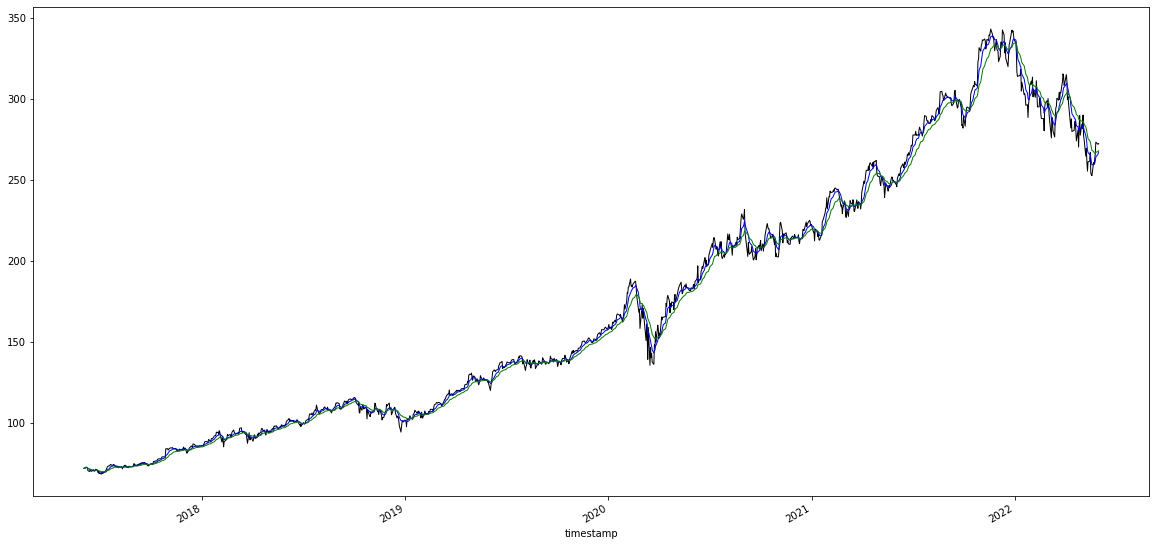

In [16]:
plt.figure(figsize = (20,10))
# plot close price, short-term and long-term moving averages 
df_microsoft_ewma['close'].plot(color = 'k', lw = 1, label = 'close')  
df_microsoft_ewma['8EWMA'].plot(color = 'b', lw = 1, label = '8-day EWMA') 
df_microsoft_ewma['20EWMA'].plot(color = 'g', lw = 1, label = '20-day EWMA')

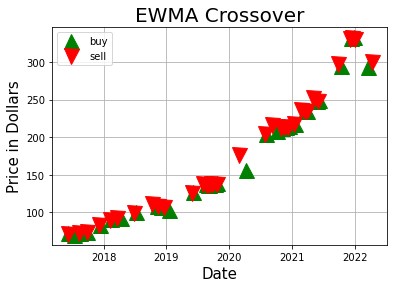

In [17]:
# plot ‘buy’ and 'sell' signals
plt.plot(df_microsoft_ewma[df_microsoft_ewma["Position"] == 1].index, 
         df_microsoft_ewma["8EWMA"][df_microsoft_ewma["Position"] == 1], 
         "^", markersize = 15, color = "g", label = 'buy')
plt.plot(df_microsoft_ewma[df_microsoft_ewma["Position"] == -1].index, 
         df_microsoft_ewma["8EWMA"][df_microsoft_ewma["Position"] == -1], 
         "v", markersize = 15, color = "r", label = 'sell')

plt.ylabel('Price in Dollars', fontsize = 15 )
plt.xlabel('Date', fontsize = 15 )
plt.title('EWMA Crossover', fontsize = 20)
plt.legend()
plt.grid()
plt.show()

In [18]:
df_microsoft_ewma

,close,8EWMA,20EWMA,Signal,Position
timestamp,,,,,
2017-06-02 04:00:00+00:00,71.76,71.760000,71.760000,0.0,NaN
2017-06-05 04:00:00+00:00,72.28,72.052500,72.033000,1.0,1.0
2017-06-06 04:00:00+00:00,72.52,72.248705,72.211823,1.0,0.0
2017-06-07 04:00:00+00:00,72.39,72.298226,72.263260,1.0,0.0
2017-06-08 04:00:00+00:00,71.95,72.190054,72.187485,1.0,0.0
...,...,...,...,...,...
2022-05-25 04:00:00+00:00,262.52,260.173906,266.336119,0.0,0.0
2022-05-26 04:00:00+00:00,265.90,261.446371,266.294584,0.0,0.0
2022-05-27 04:00:00+00:00,273.24,264.067178,266.956052,0.0,0.0


In [19]:
# Set initial capital
initial_capital = float(10000)

# Set the share size
share_size = 20

In [20]:
# Buy a 20 share position when the dual moving average crossover Signal equals 1
# Otherwise, `Position` should be zero (sell)
df_microsoft_ewma['Position'] = share_size * df_microsoft_ewma['Signal']

# Determine the points in time where a 20 share position is bought or sold
df_microsoft_ewma['Entry/Exit Position'] = df_microsoft_ewma['Position'].diff()

# Multiply the close price by the number of shares held, or the Position
df_microsoft_ewma['Portfolio Holdings'] = df_microsoft_ewma['close'] * df_microsoft_ewma['Position']

# Subtract the amount of either the cost or proceeds of the trade from the initial capital invested
df_microsoft_ewma['Portfolio Cash'] = initial_capital - (df_microsoft_ewma['close'] * df_microsoft_ewma['Entry/Exit Position']).cumsum() 

# Calculate the total portfolio value by adding the portfolio cash to the portfolio holdings (or investments)
df_microsoft_ewma['Portfolio Total'] = df_microsoft_ewma['Portfolio Cash'] + df_microsoft_ewma['Portfolio Holdings']

# Calculate the portfolio daily returns
df_microsoft_ewma['Portfolio Daily Returns'] = df_microsoft_ewma['Portfolio Total'].pct_change()

# Calculate the portfolio cumulative returns
df_microsoft_ewma['Portfolio Cumulative Returns'] = (1 + df_microsoft_ewma['Portfolio Daily Returns']).cumprod() - 1

df_microsoft_ewma.head(30)

,close,8EWMA,20EWMA,Signal,Position,Entry/Exit Position,Portfolio Holdings,Portfolio Cash,Portfolio Total,Portfolio Daily Returns,Portfolio Cumulative Returns
timestamp,,,,,,,,,,,
2017-06-02 04:00:00+00:00,71.76,71.760000,71.760000,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN
2017-06-05 04:00:00+00:00,72.28,72.052500,72.033000,1.0,20.0,20.0,1445.6,8554.4,10000.0,NaN,NaN
2017-06-06 04:00:00+00:00,72.52,72.248705,72.211823,1.0,20.0,0.0,1450.4,8554.4,10004.8,0.000480,0.00048
2017-06-07 04:00:00+00:00,72.39,72.298226,72.263260,1.0,20.0,0.0,1447.8,8554.4,10002.2,-0.000260,0.00022
2017-06-08 04:00:00+00:00,71.95,72.190054,72.187485,1.0,20.0,0.0,1439.0,8554.4,9993.4,-0.000880,-0.00066
2017-06-09 04:00:00+00:00,70.32,71.656332,71.793531,0.0,0.0,-20.0,0.0,9960.8,9960.8,-0.003262,-0.00392
2017-06-12 04:00:00+00:00,69.78,71.152643,71.412822,0.0,0.0,0.0,0.0,9960.8,9960.8,0.000000,-0.00392
2017-06-13 04:00:00+00:00,70.65,71.023673,71.280965,0.0,0.0,0.0,0.0,9960.8,9960.8,0.000000,-0.00392
2017-06-14 04:00:00+00:00,70.27,70.836717,71.118801,0.0,0.0,0.0,0.0,9960.8,9960.8,0.000000,-0.00392


In [21]:
# Saved df to csv so Tempest can work with the data 
df_microsoft_ewma.to_csv('../data/MSFT_daily_EWMA.csv', index=True)

In [22]:
# Get closing prices for TSLA from the five years

tesla = "TSLA"

df_tesla_daily = alpaca.get_bars(
    tesla,
    timeframe,
    start = start,
    end = end,
    limit = 10000
).df

# Drop unneccesary columns
df_tesla_daily = df_tesla_daily.drop(["trade_count", "vwap"], axis=1)
# Display sample data
df_tesla_daily

,open,high,low,close,volume
timestamp,,,,,
2017-06-01 04:00:00+00:00,344.07,344.8800,337.2900,340.37,7613744
2017-06-02 04:00:00+00:00,339.97,342.8800,335.9300,339.85,5593073
2017-06-05 04:00:00+00:00,338.50,348.4400,334.2100,347.32,6784368
2017-06-06 04:00:00+00:00,344.70,359.4929,339.9700,352.85,11086803
2017-06-07 04:00:00+00:00,356.37,360.5000,355.1400,359.65,9398787
...,...,...,...,...,...
2022-05-25 04:00:00+00:00,624.00,669.3200,623.0101,658.80,30654903
2022-05-26 04:00:00+00:00,661.00,718.6699,653.6600,707.73,35299789
2022-05-27 04:00:00+00:00,722.10,759.8000,720.5311,759.63,29714124


In [23]:
# Create a new df filtering the index and close columns
df_tesla_signals = df_tesla_daily.loc[:, ["close"]]

# Create a column for the daily returns
df_tesla_signals["Actual Returns"] = df_tesla_daily["close"].pct_change()

# Drop all NaN values from the DataFrame
df_tesla_signals = df_tesla_signals.dropna()

# Show signals df
display(df_tesla_signals.head())
display(df_tesla_signals.tail())

,close,Actual Returns
timestamp,,
2017-06-02 04:00:00+00:00,339.85,-0.001528
2017-06-05 04:00:00+00:00,347.32,0.021980
2017-06-06 04:00:00+00:00,352.85,0.015922
2017-06-07 04:00:00+00:00,359.65,0.019272
2017-06-08 04:00:00+00:00,370.00,0.028778


,close,Actual Returns
timestamp,,
2022-05-25 04:00:00+00:00,658.80,0.048777
2022-05-26 04:00:00+00:00,707.73,0.074271
2022-05-27 04:00:00+00:00,759.63,0.073333
2022-05-31 04:00:00+00:00,758.26,-0.001804
2022-06-01 04:00:00+00:00,740.37,-0.023593


In [24]:
# EWMA indicators TSLA
short_span = 8
long_span = 20
smooth_span = 4
df_tesla_ewma = df_tesla_signals.loc[:, ["close"]]
df_tesla_ewma['8EWMA'] = df_tesla_ewma['close'].ewm(span= short_span).mean()
df_tesla_ewma['20EWMA'] = df_tesla_ewma['close'].ewm(span= long_span).mean()
df_tesla_ewma

,close,8EWMA,20EWMA
timestamp,,,
2017-06-02 04:00:00+00:00,339.85,339.850000,339.850000
2017-06-05 04:00:00+00:00,347.32,344.051875,343.771750
2017-06-06 04:00:00+00:00,352.85,347.744352,347.105229
2017-06-07 04:00:00+00:00,359.65,351.917053,350.726710
2017-06-08 04:00:00+00:00,370.00,357.534316,355.388755
...,...,...,...
2022-05-25 04:00:00+00:00,658.80,690.034443,766.418346
2022-05-26 04:00:00+00:00,707.73,693.966789,760.828980
2022-05-27 04:00:00+00:00,759.63,708.558614,760.714791


In [25]:
# Create column "Signal" such that if 8EWMA is gerater than 20EWMA then set sugnal to 1, else 
df_tesla_ewma['Signal'] = 0.0
df_tesla_ewma['Signal'] = np.where(df_tesla_ewma['8EWMA'] > df_tesla_ewma['20EWMA'], 1.0, 0.0)

df_tesla_ewma

,close,8EWMA,20EWMA,Signal
timestamp,,,,
2017-06-02 04:00:00+00:00,339.85,339.850000,339.850000,0.0
2017-06-05 04:00:00+00:00,347.32,344.051875,343.771750,1.0
2017-06-06 04:00:00+00:00,352.85,347.744352,347.105229,1.0
2017-06-07 04:00:00+00:00,359.65,351.917053,350.726710,1.0
2017-06-08 04:00:00+00:00,370.00,357.534316,355.388755,1.0
...,...,...,...,...
2022-05-25 04:00:00+00:00,658.80,690.034443,766.418346,0.0
2022-05-26 04:00:00+00:00,707.73,693.966789,760.828980,0.0
2022-05-27 04:00:00+00:00,759.63,708.558614,760.714791,0.0


In [26]:
# create a new column 'Position' which is a day-to-day difference of the 'Signal' column
df_tesla_ewma['Position'] = df_tesla_ewma['Signal'].diff()
df_tesla_ewma

,close,8EWMA,20EWMA,Signal,Position
timestamp,,,,,
2017-06-02 04:00:00+00:00,339.85,339.850000,339.850000,0.0,NaN
2017-06-05 04:00:00+00:00,347.32,344.051875,343.771750,1.0,1.0
2017-06-06 04:00:00+00:00,352.85,347.744352,347.105229,1.0,0.0
2017-06-07 04:00:00+00:00,359.65,351.917053,350.726710,1.0,0.0
2017-06-08 04:00:00+00:00,370.00,357.534316,355.388755,1.0,0.0
...,...,...,...,...,...
2022-05-25 04:00:00+00:00,658.80,690.034443,766.418346,0.0,0.0
2022-05-26 04:00:00+00:00,707.73,693.966789,760.828980,0.0,0.0
2022-05-27 04:00:00+00:00,759.63,708.558614,760.714791,0.0,0.0


<AxesSubplot:xlabel='timestamp'>

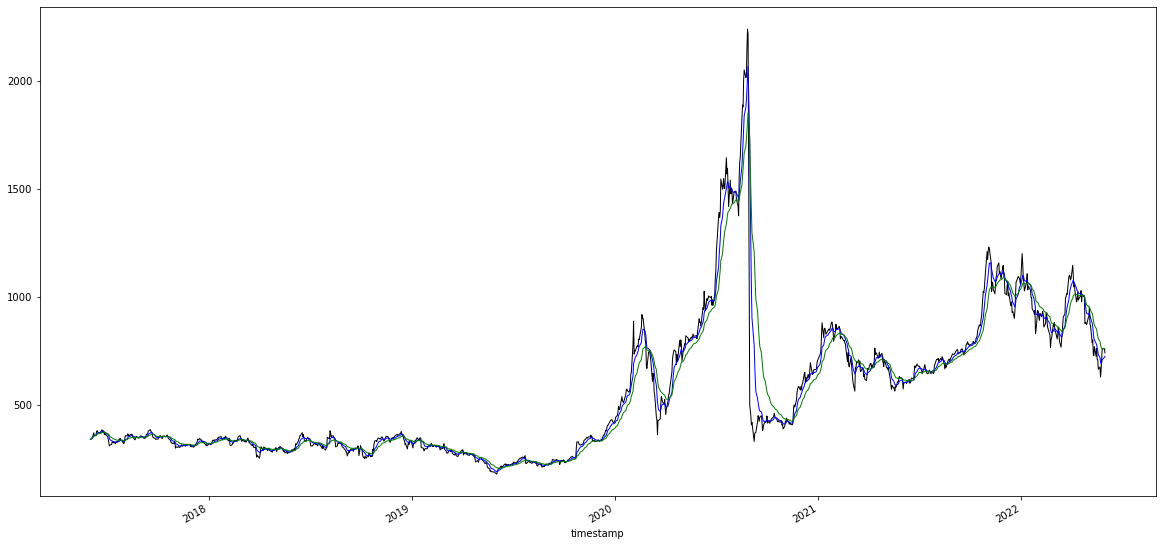

In [27]:
plt.figure(figsize = (20,10))
# plot close price, short-term and long-term moving averages 
df_tesla_ewma['close'].plot(color = 'k', lw = 1, label = 'close')  
df_tesla_ewma['8EWMA'].plot(color = 'b', lw = 1, label = '8-day EWMA') 
df_tesla_ewma['20EWMA'].plot(color = 'g', lw = 1, label = '20-day EWMA')

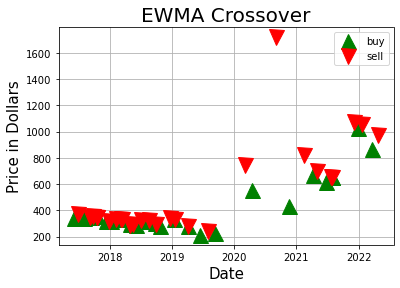

In [28]:
# plot ‘buy’ and 'sell' signals
plt.plot(df_tesla_ewma[df_tesla_ewma["Position"] == 1].index, 
         df_tesla_ewma["8EWMA"][df_tesla_ewma["Position"] == 1], 
         "^", markersize = 15, color = "g", label = 'buy')
plt.plot(df_tesla_ewma[df_tesla_ewma["Position"] == -1].index, 
         df_tesla_ewma["8EWMA"][df_tesla_ewma["Position"] == -1], 
         "v", markersize = 15, color = "r", label = 'sell')

plt.ylabel('Price in Dollars', fontsize = 15 )
plt.xlabel('Date', fontsize = 15 )
plt.title('EWMA Crossover', fontsize = 20)
plt.legend()
plt.grid()
plt.show()

In [29]:
# Buy a share position when the dual moving average crossover Signal equals 1
# Otherwise, `Position` should be zero (sell)
df_tesla_ewma['Position'] = share_size * df_tesla_ewma['Signal']

# Determine the points in time where a  share position is bought or sold
df_tesla_ewma['Entry/Exit Position'] = df_tesla_ewma['Position'].diff()

# Multiply the close price by the number of shares held, or the Position
df_tesla_ewma['Portfolio Holdings'] = df_tesla_ewma['close'] * df_tesla_ewma['Position']

# Subtract the amount of either the cost or proceeds of the trade from the initial capital invested
df_tesla_ewma['Portfolio Cash'] = initial_capital - (df_tesla_ewma['close'] * df_tesla_ewma['Entry/Exit Position']).cumsum() 

# Calculate the total portfolio value by adding the portfolio cash to the portfolio holdings (or investments)
df_tesla_ewma['Portfolio Total'] = df_tesla_ewma['Portfolio Cash'] + df_tesla_ewma['Portfolio Holdings']

# Calculate the portfolio daily returns
df_tesla_ewma['Portfolio Daily Returns'] = df_tesla_ewma['Portfolio Total'].pct_change()

# Calculate the portfolio cumulative returns
df_tesla_ewma['Portfolio Cumulative Returns'] = (1 + df_tesla_ewma['Portfolio Daily Returns']).cumprod() - 1

df_tesla_ewma

,close,8EWMA,20EWMA,Signal,Position,Entry/Exit Position,Portfolio Holdings,Portfolio Cash,Portfolio Total,Portfolio Daily Returns,Portfolio Cumulative Returns
timestamp,,,,,,,,,,,
2017-06-02 04:00:00+00:00,339.85,339.850000,339.850000,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN
2017-06-05 04:00:00+00:00,347.32,344.051875,343.771750,1.0,20.0,20.0,6946.4,3053.6,10000.0,NaN,NaN
2017-06-06 04:00:00+00:00,352.85,347.744352,347.105229,1.0,20.0,0.0,7057.0,3053.6,10110.6,0.011060,0.01106
2017-06-07 04:00:00+00:00,359.65,351.917053,350.726710,1.0,20.0,0.0,7193.0,3053.6,10246.6,0.013451,0.02466
2017-06-08 04:00:00+00:00,370.00,357.534316,355.388755,1.0,20.0,0.0,7400.0,3053.6,10453.6,0.020202,0.04536
...,...,...,...,...,...,...,...,...,...,...,...
2022-05-25 04:00:00+00:00,658.80,690.034443,766.418346,0.0,0.0,0.0,0.0,22433.4,22433.4,0.000000,1.24334
2022-05-26 04:00:00+00:00,707.73,693.966789,760.828980,0.0,0.0,0.0,0.0,22433.4,22433.4,0.000000,1.24334
2022-05-27 04:00:00+00:00,759.63,708.558614,760.714791,0.0,0.0,0.0,0.0,22433.4,22433.4,0.000000,1.24334


In [30]:
# for fun
# Set initial capital
initial_capital_2 = float(150000)

# Set the share size
share_size_2 = 431

In [31]:
# Buy a share position when the dual moving average crossover Signal equals 1
# Otherwise, `Position` should be zero (sell)
df_tesla_ewma['Position'] = share_size_2 * df_tesla_ewma['Signal']

# Determine the points in time where a  share position is bought or sold
df_tesla_ewma['Entry/Exit Position'] = df_tesla_ewma['Position'].diff()

# Multiply the close price by the number of shares held, or the Position
df_tesla_ewma['Portfolio Holdings'] = df_tesla_ewma['close'] * df_tesla_ewma['Position']

# Subtract the amount of either the cost or proceeds of the trade from the initial capital invested
df_tesla_ewma['Portfolio Cash'] = initial_capital_2 - (df_tesla_ewma['close'] * df_tesla_ewma['Entry/Exit Position']).cumsum() 

# Calculate the total portfolio value by adding the portfolio cash to the portfolio holdings (or investments)
df_tesla_ewma['Portfolio Total'] = df_tesla_ewma['Portfolio Cash'] + df_tesla_ewma['Portfolio Holdings']

# Calculate the portfolio daily returns
df_tesla_ewma['Portfolio Daily Returns'] = df_tesla_ewma['Portfolio Total'].pct_change()

# Calculate the portfolio cumulative returns
df_tesla_ewma['Portfolio Cumulative Returns'] = (1 + df_tesla_ewma['Portfolio Daily Returns']).cumprod() - 1

df_tesla_ewma

,close,8EWMA,20EWMA,Signal,Position,Entry/Exit Position,Portfolio Holdings,Portfolio Cash,Portfolio Total,Portfolio Daily Returns,Portfolio Cumulative Returns
timestamp,,,,,,,,,,,
2017-06-02 04:00:00+00:00,339.85,339.850000,339.850000,0.0,0.0,NaN,0.00,NaN,NaN,NaN,NaN
2017-06-05 04:00:00+00:00,347.32,344.051875,343.771750,1.0,431.0,431.0,149694.92,305.08,150000.00,NaN,NaN
2017-06-06 04:00:00+00:00,352.85,347.744352,347.105229,1.0,431.0,0.0,152078.35,305.08,152383.43,0.015890,0.015890
2017-06-07 04:00:00+00:00,359.65,351.917053,350.726710,1.0,431.0,0.0,155009.15,305.08,155314.23,0.019233,0.035428
2017-06-08 04:00:00+00:00,370.00,357.534316,355.388755,1.0,431.0,0.0,159470.00,305.08,159775.08,0.028721,0.065167
...,...,...,...,...,...,...,...,...,...,...,...
2022-05-25 04:00:00+00:00,658.80,690.034443,766.418346,0.0,0.0,0.0,0.00,417939.77,417939.77,0.000000,1.786265
2022-05-26 04:00:00+00:00,707.73,693.966789,760.828980,0.0,0.0,0.0,0.00,417939.77,417939.77,0.000000,1.786265
2022-05-27 04:00:00+00:00,759.63,708.558614,760.714791,0.0,0.0,0.0,0.00,417939.77,417939.77,0.000000,1.786265


In [32]:
# Saved df to csv so I can test model with unknown data
df_tesla_ewma.to_csv('../data/TSLA_daily_EWMA.csv', index=True)